# Imports

In [10]:
import datetime


# Blockchain
import web3
# Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import pymongo

# Constants

In [11]:
PD_COL = 0
PD_ROW = 1

# Connect to MongoDB

In [12]:
client = pymongo.MongoClient('mongodb://localhost')

# Connect to Infura Node

In [50]:
w3 = web3.Web3(
    web3.Web3.WebsocketProvider("wss://ropsten.infura.io/ws/v3/109fcb200a994e9b84173b41229a8888"))

w3.isConnected()

True

# Get Oracle Databases

In [14]:
db_push_inbound_oracle = client.pushInboundOracle

In [15]:
db_push_outbound_oracle = client.pushOutboundOracle

In [16]:
db_pull_inbound_oracle = client.pullInboundOracle

In [17]:
db_pull_outbound_oracle = client.pullOutboundOracle

# First Look at the Databases
## Push Inbound Oracles

In [18]:
db_push_inbound_oracle.list_collection_names()

['arrival']

In [19]:
db_push_inbound_oracle.arrival.count_documents({})

2591

In [20]:
push_inbound_oracle_arrival = [
    oracle for oracle in db_push_inbound_oracle.arrival.find()]

In [21]:
df_push_inbound_oracle_arrival = pd.DataFrame(push_inbound_oracle_arrival)

In [22]:
df_push_inbound_oracle_arrival.head()

,_id,transaction_hash,start_timestamp,end_timestamp,document
0,5e976a8d53a82761edb60a2f,0x904bb68ca50b9f8a1f1059b789ec2d87dcab55d066fb...,1.586982e+09,1.586982e+09,"{'order': 'Samsung Galaxy S10e', 'location': '..."
1,5e976e1153a82761edb60a31,0xc2c2df9ec9c21d99497550ec6482a93a062ffac06d2f...,1.586982e+09,1.586982e+09,"{'order': 'Motorola Moto G7 Plus', 'location':..."
2,5e97719553a82761edb60a33,0x51e549887956adcce5ccf699dabaf766b006602fc360...,1.586983e+09,1.586983e+09,"{'order': 'iPhone 11 Pro', 'location': 'Budape..."
3,5e97751953a82761edb60a35,0x8202187cb0c3b49a02c65c2869fa09dd605c0b1894b2...,1.586984e+09,1.586984e+09,"{'order': 'Samsung Galaxy Note10+', 'location'..."
4,5e97789d53a82761edb60a37,0xda20a5ff5535d6931e057eb5ff5d57568594e13981e1...,1.586985e+09,1.586985e+09,"{'order': 'Samsung Galaxy S10e', 'location': '..."


## Push Outbound Oracles

In [23]:
db_push_outbound_oracle.list_collection_names()

['arrival']

In [24]:
db_push_outbound_oracle.arrival.count_documents({})

438

In [25]:
push_outbound_oracle_arrival = [
    oracle for oracle in db_push_outbound_oracle.arrival.find()]

In [26]:
push_outbound_oracle_arrival[0]

{'_id': ObjectId('5e976aa69c1a8f290e4bf129'),
 'received_timestamp': 1586981542.582107,
 'event': {'address': '0x1186aEDAb8f37C08CC00a887dBb119787cfE6AAf',
  'blockHash': b'8\xb2g\xba\xc9)=&\xcc2\x98\xe2\xbe\xaex)[\x87\x99,\xf4d~\x17\xf8-\xbb\xc2m\x86%V',
  'blockNumber': 7723878,
  'data': '0x000000000000000000000000000000000000000000000000000000000000006000000000000000000000000000000000000000000000000000000000000000a0000000000000000000000000000000000000000000000000000000005e976a8c000000000000000000000000000000000000000000000000000000000000001353616d73756e672047616c617879205331306500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000a4272617469736c61766100000000000000000000000000000000000000000000',
  'logIndex': 5,
  'removed': False,
  'topics': [b'\xc1\xfe\x86\xca\xc1\xc2=\xaa\xf6J\x00A<\xa2(#\x90h.\x01>K\x99o-\xe98\x82\xa0F\xb8;'],
  'transactionHash': b'\x90K\xb6\x8c\xa5\x0b\x9f\x8a\x1f\x10Y\xb7\x89\xec-\x87\xdc\xabU\xd0f\xfbLI\xa9\xc6.>i\x80&>

In [27]:
df_push_outbound_oracle_arrival = pd.DataFrame(push_outbound_oracle_arrival)

In [28]:
df_push_outbound_oracle_arrival.head()

,_id,received_timestamp,event
0,5e976aa69c1a8f290e4bf129,1.586982e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...
1,5e976e269c1a8f290e4bf12b,1.586982e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...
2,5e9771c59c1a8f290e4bf12d,1.586983e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...
3,5e97751e9c1a8f290e4bf12f,1.586984e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...
4,5e9778a49c1a8f290e4bf131,1.586985e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...


## Pull Inbound Oracles

In [29]:
db_pull_inbound_oracle.list_collection_names()

['verifyCustomer', 'order']

In [30]:
for collection_name in db_pull_inbound_oracle.list_collection_names():
    collection_count = db_pull_inbound_oracle[collection_name].count_documents({})
    print(f'{collection_name}: {collection_count}')

verifyCustomer: 129
order: 126


In [31]:
pull_inbound_oracle_verify_customer = [
    oracle for oracle in db_pull_inbound_oracle.verifyCustomer.find()]

pull_inbound_oracle_order = [
    oracle for oracle in db_pull_inbound_oracle.order.find()]

In [32]:
df_pull_inbound_oracle_verify_customer = pd.DataFrame(
    pull_inbound_oracle_verify_customer)

df_pull_inbound_oracle_order = pd.DataFrame(
    pull_inbound_oracle_order)

In [33]:
df_pull_inbound_oracle_verify_customer.head()

,_id,transaction_hash,start_timestamp,end_timestamp,document
0,5e976c9d2f3ca046f03a6f51,0x7f64f7aae80e41e8bf0f02d478f297a175bb230cd678...,1.586982e+09,1.586982e+09,"{'first_name': 'Natascha', 'last_name': 'Danvo..."
1,5e9770212f3ca046f03a6f55,0x2fea80ac05863ad01b1c6301a4aae81a5f89b7a0fb13...,1.586983e+09,1.586983e+09,"{'first_name': 'Tony', 'last_name': 'Stark', '..."
2,5e9773a52f3ca046f03a6f59,0x07d21bb163549ff2353adbb81960ea2d641348998f63...,1.586984e+09,1.586984e+09,"{'first_name': 'Carol', 'last_name': 'Stark', ..."
3,5e9777292f3ca046f03a6f5d,0x3c044a17885fe3fda21ea5449204b66eb82c38015dd5...,1.586985e+09,1.586985e+09,"{'first_name': 'Natascha', 'last_name': 'Roger..."
4,5e977aad2f3ca046f03a6f61,0x046d8a57f570a508a0f109e79d765196dec804cec3c1...,1.586986e+09,1.586986e+09,"{'first_name': 'Steve', 'last_name': 'Romanof'..."


In [34]:
df_pull_inbound_oracle_order.head()

,_id,transaction_hash,order,order_start_timestamp,order_end_timestamp,verify_customer,verify_customer_received_timestamp
0,5e976ca52f3ca046f03a6f53,0xbe5e22a75965be9e86d6cd47276fe58ee6b33d8167f7...,"{'is_verified': True, 'order_ID': 1, 'error_co...",1.586982e+09,1.586982e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586982e+09
1,5e9770362f3ca046f03a6f57,0x07eb2eaa20021d65429969959558236388e4906c0a94...,"{'is_verified': True, 'order_ID': 2, 'error_co...",1.586983e+09,1.586983e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586983e+09
2,5e9773c52f3ca046f03a6f5b,0x91c8720954668a676689c8b3730b239dc9d1fe1336d5...,"{'is_verified': True, 'order_ID': 3, 'error_co...",1.586984e+09,1.586984e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586984e+09
3,5e9777452f3ca046f03a6f5f,0x6a8af4435823d0b5e195ab726e602fbc7f2ba12f04f1...,"{'is_verified': True, 'order_ID': 4, 'error_co...",1.586985e+09,1.586985e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586985e+09
4,5e977acd2f3ca046f03a6f63,0x71a6436d8ba4e22482811d12f77a5c6b55dc6d824fd8...,"{'is_verified': True, 'order_ID': 5, 'error_co...",1.586986e+09,1.586986e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586986e+09


## Pull Outbound Oracles

In [35]:
db_pull_outbound_oracle.list_collection_names()

['arrival']

In [36]:
db_pull_outbound_oracle.arrival.count_documents({})

2611

In [37]:
pull_outbound_oracle_arrival = [
    oracle for oracle in db_pull_outbound_oracle.arrival.find()]

In [38]:
pull_outbound_oracle_arrival[0]

{'_id': ObjectId('5e976b9d4854cbebf27c7b1f'),
 'start_timestamp': 1586981789.712676,
 'end_timestamp': 1586981789.841327,
 'transaction_hash': '0xf15753a9ef3d83e6d9974a936795039605449cdf2530545c8b339deaa6a7641f',
 'state': {'_order': 'iPhone 11',
  '_location': 'Zagreb',
  '_timestamp': 1586791367}}

In [39]:
df_pull_outbound_oracle_arrival = pd.DataFrame(pull_outbound_oracle_arrival)

In [40]:
df_pull_outbound_oracle_arrival.head()

,_id,start_timestamp,end_timestamp,transaction_hash,state
0,5e976b9d4854cbebf27c7b1f,1.586982e+09,1.586982e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
1,5e976f214854cbebf27c7b21,1.586983e+09,1.586983e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
2,5e9772a54854cbebf27c7b23,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
3,5e9776294854cbebf27c7b25,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
4,5e9779ad4854cbebf27c7b27,1.586985e+09,1.586985e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."


# Add Columns

## Blocks

In [41]:
def get_transaction(transaction_hash):
    r'''This function is used when we some of the transactions seem to have not gone through.
    '''
    try:
        return w3.eth.getTransaction(transaction_hash)
    except:
        return 0

In [42]:
def get_block(transaction):
    r'''Same as get_transaction'''
    try:
        return w3.eth.getBlock(transaction["blockNumber"])
    except:
        return 0

### Push Inbound Oracle

In [43]:
df_push_inbound_oracle_arrival["transaction"] = df_push_inbound_oracle_arrival.transaction_hash.apply(
    lambda transaction_hash: get_transaction(transaction_hash))

In [44]:
df_push_inbound_oracle_arrival["block"] = df_push_inbound_oracle_arrival.transaction.apply(
    lambda transaction: get_block(transaction))

### Pull Inbound Oracle

In [45]:
df_pull_inbound_oracle_verify_customer["transaction"] = (
    df_pull_inbound_oracle_verify_customer
        .transaction_hash
        .apply(
            lambda transaction_hash: w3.eth.getTransaction(transaction_hash)))

df_pull_inbound_oracle_verify_customer["block"] = df_pull_inbound_oracle_verify_customer.transaction.apply(
    lambda transaction: w3.eth.getBlock(transaction["blockNumber"], full_transactions=True))

In [46]:
df_pull_inbound_oracle_order["transaction"] = df_pull_inbound_oracle_order.transaction_hash.apply(
    lambda transaction_hash: w3.eth.getTransaction(transaction_hash))

df_pull_inbound_oracle_order["block"] = df_pull_inbound_oracle_order.transaction.apply(
    lambda transaction: w3.eth.getBlock(transaction["blockNumber"], full_transactions=True))

### Pull Outbound Oracle

In [48]:
df_pull_outbound_oracle_arrival.head()

,_id,start_timestamp,end_timestamp,transaction_hash,state
0,5e976b9d4854cbebf27c7b1f,1.586982e+09,1.586982e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
1,5e976f214854cbebf27c7b21,1.586983e+09,1.586983e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
2,5e9772a54854cbebf27c7b23,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
3,5e9776294854cbebf27c7b25,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."
4,5e9779ad4854cbebf27c7b27,1.586985e+09,1.586985e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',..."


In [51]:
df_pull_outbound_oracle_arrival["transaction"] = df_pull_outbound_oracle_arrival.transaction_hash.apply(
    lambda transaction_hash: w3.eth.getTransaction(transaction_hash))

In [52]:
df_pull_outbound_oracle_arrival["block"] = df_pull_outbound_oracle_arrival.transaction.apply(
    lambda transaction: w3.eth.getBlock(transaction["blockNumber"], full_transactions=True))

### Push Outbound Oracle

In [53]:
df_push_outbound_oracle_arrival["transaction"] = df_push_outbound_oracle_arrival.event.apply(
    lambda event: w3.eth.getTransaction(event["transactionHash"]))

In [54]:
df_push_outbound_oracle_arrival["block"] = df_push_outbound_oracle_arrival.event.apply(
    lambda event: w3.eth.getBlock(event["blockNumber"], full_transactions=True))

> Dirty Hack here: I decode arrival here and append it as a column.

In [55]:
ARRIVAL_ABI = '[\
    {\
        "constant": "false",\
        "inputs": [\
            {"name": "_order", "type": "string"},\
            {"name": "_location", "type": "string"},\
            {"name": "_timestamp", "type": "uint256"}\
        ],\
        "name": "setArrival",\
        "outputs": "[]",\
        "payable": "true",\
        "stateMutability": "payable",\
        "type": "function"\
    },\
    {\
        "anonymous": "false",\
        "inputs": [\
            {"indexed": "false", "name": "order", "type": "string"},\
            {"indexed": "false", "name": "location", "type": "string"},\
            {"indexed": "false", "name": "timestamp", "type": "uint256"}\
        ],\
        "name": "Arrival",\
        "type": "event"\
    }\
]'

arrival_contract = w3.eth.contract(
    address=web3.Web3.toChecksumAddress("0x1186aedab8f37c08cc00a887dbb119787cfe6aaf"),
    abi=ARRIVAL_ABI)

In [56]:
df_push_outbound_oracle_arrival["decodedInput"] = df_push_outbound_oracle_arrival.transaction.apply(
    lambda transaction: arrival_contract.decode_function_input(transaction.input))

In [57]:
IDX_FUNCTION_SELECTOR = 0
IDX_DECODED_FUNCTION_INPUT = 1

df_push_outbound_oracle_arrival["arrivalCreationTimestamp"] = df_push_outbound_oracle_arrival.decodedInput.apply(
    lambda decodedInput: decodedInput[IDX_DECODED_FUNCTION_INPUT]["_timestamp"])

## Delete Transactions that are not found.

In [58]:
df_push_inbound_oracle_arrival = df_push_inbound_oracle_arrival[
    df_push_inbound_oracle_arrival.transaction != 0]

In [59]:
df_pull_inbound_oracle_order = df_pull_inbound_oracle_order[
    df_pull_inbound_oracle_order.transaction != 0]

df_pull_inbound_oracle_verify_customer = df_pull_inbound_oracle_verify_customer[
    df_pull_inbound_oracle_verify_customer.transaction != 0]

## Transaction timestamps
The timestamp of a transaction it the timestamp of its block.

### Push Inbound Oracle

In [60]:
df_push_inbound_oracle_arrival["transaction_timestamp"] = df_push_inbound_oracle_arrival.block.apply(
    lambda block: block["timestamp"])

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Pull Inbound oracle

In [61]:
df_pull_inbound_oracle_verify_customer["transaction_timestamp"] = (
    df_pull_inbound_oracle_verify_customer
        .block
        .apply(
            lambda block: block["timestamp"]))

In [62]:
df_pull_inbound_oracle_order["transaction_timestamp"] = df_pull_inbound_oracle_order.block.apply(
    lambda block: block["timestamp"])

### Push Outbound Oracle

In [63]:
df_push_outbound_oracle_arrival["transaction_timestamp"] = df_push_outbound_oracle_arrival.block.apply(
    lambda block: block["timestamp"])

## Datetime

In [64]:
def convert_timestamp_to_datetime(timestamp):
    r"""Converts a timestamp to a datetime.
    """
    return datetime.datetime.fromtimestamp(timestamp)

### Push Inbound Oracle

In [65]:
df_push_inbound_oracle_arrival["start_datetime"] = df_push_inbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["start_timestamp"]), axis=PD_ROW)

df_push_inbound_oracle_arrival["end_datetime"] = df_push_inbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["end_timestamp"]), axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [66]:
df_push_inbound_oracle_arrival["transaction_datetime"] = df_push_inbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["transaction_timestamp"]), axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Push Outbound Oracle

In [67]:
df_push_outbound_oracle_arrival["received_datetime"] = df_push_outbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["received_timestamp"]), axis=PD_ROW)

In [68]:
df_push_outbound_oracle_arrival["transaction_datetime"] = df_push_outbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["transaction_timestamp"]), axis=PD_ROW)

In [69]:
df_push_outbound_oracle_arrival["arrival_creation_datetime"] = (
    df_push_outbound_oracle_arrival
        .arrivalCreationTimestamp
        .apply(
            lambda arrivalCreationTimestamp: convert_timestamp_to_datetime(arrivalCreationTimestamp))
)

### Pull Inbound Oracle

In [70]:
df_pull_inbound_oracle_verify_customer["start_datetime"] = df_pull_inbound_oracle_verify_customer.apply(
    lambda row: convert_timestamp_to_datetime(row["start_timestamp"]), axis=PD_ROW)

df_pull_inbound_oracle_verify_customer["end_datetime"] = df_pull_inbound_oracle_verify_customer.apply(
    lambda row: convert_timestamp_to_datetime(row["end_timestamp"]), axis=PD_ROW)

In [71]:
df_pull_inbound_oracle_verify_customer["transaction_datetime"] = df_pull_inbound_oracle_verify_customer.apply(
    lambda row: convert_timestamp_to_datetime(row["transaction_timestamp"]), axis=PD_ROW)

In [72]:
df_pull_inbound_oracle_order["order_start_datetime"] = df_pull_inbound_oracle_order.apply(
    lambda row: convert_timestamp_to_datetime(row["order_start_timestamp"]), axis=PD_ROW)

df_pull_inbound_oracle_order["order_end_datetime"] = df_pull_inbound_oracle_order.apply(
    lambda row: convert_timestamp_to_datetime(row["order_end_timestamp"]), axis=PD_ROW)

df_pull_inbound_oracle_order["verify_customer_received_datetime"] = df_pull_inbound_oracle_order.apply(
    lambda row: convert_timestamp_to_datetime(row["verify_customer_received_timestamp"]), axis=PD_ROW)

In [73]:
df_pull_inbound_oracle_order["transaction_datetime"] = (
    df_pull_inbound_oracle_order
        .transaction_timestamp
        .apply(
            lambda transaction_timestamp: convert_timestamp_to_datetime(transaction_timestamp)))

### Pull Outbound Oracle

In [74]:
df_pull_outbound_oracle_arrival["start_datetime"] = df_pull_outbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["start_timestamp"]), axis=PD_ROW)

df_pull_outbound_oracle_arrival["end_datetime"] = df_pull_outbound_oracle_arrival.apply(
    lambda row: convert_timestamp_to_datetime(row["end_timestamp"]), axis=PD_ROW)

## $dt$
$dt$ can be defined in the following ways
- either we measure the time we get the transaction hash, or
- the time the transaction gets mined

### Push Inbound Oracle

In [75]:
df_push_inbound_oracle_arrival["dt_transaction_hash"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["end_datetime"] - row["start_datetime"], axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [76]:
df_push_inbound_oracle_arrival["dt_transaction_hash_seconds"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["dt_transaction_hash"].seconds, axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [77]:
df_push_inbound_oracle_arrival["dt_transaction_hash_seconds_total"] = (
    df_push_inbound_oracle_arrival
        .dt_transaction_hash
        .apply(lambda dt_transaction_hash: dt_transaction_hash.total_seconds()))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
df_push_inbound_oracle_arrival["dt_transaction_hash_microseconds"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["dt_transaction_hash"].microseconds, axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
df_push_inbound_oracle_arrival["dt_transaction_mined"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["transaction_datetime"] - row["start_datetime"], axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [80]:
df_push_inbound_oracle_arrival["dt_transaction_mined_seconds"] = (
    df_push_inbound_oracle_arrival
        .dt_transaction_mined
        .apply(lambda dt_block: dt_block.seconds))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [81]:
df_push_inbound_oracle_arrival["dt_transaction_mined_seconds_total"] = (
    df_push_inbound_oracle_arrival
        .dt_transaction_mined
        .apply(lambda dt_block: dt_block.total_seconds()))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


### Push Outbound Oracle  


In [82]:
df_push_outbound_oracle_arrival["dt_transaction_mined"] = df_push_outbound_oracle_arrival.apply(
    lambda row: row["received_datetime"] - row["transaction_datetime"], axis=PD_ROW)

In [83]:
df_push_outbound_oracle_arrival["dt_transaction_mined_seconds_total"] = (
    df_push_outbound_oracle_arrival
        .dt_transaction_mined
        .apply(lambda dt: dt.total_seconds()))

In [84]:
df_push_outbound_oracle_arrival["dt_round_trip_time"] = df_push_outbound_oracle_arrival.apply(
    lambda row: row["received_datetime"] - row["arrival_creation_datetime"], axis=PD_ROW)

In [85]:
df_push_outbound_oracle_arrival["dt_round_trip_time_seconds_total"] = (
    df_push_outbound_oracle_arrival
        .dt_round_trip_time
        .apply(
            lambda dt_round_trip_time: dt_round_trip_time.total_seconds()) 
)

### Pull Inbound Oracle

In [86]:
df_pull_inbound_oracle_order["dt_transaction_hash"] = df_pull_inbound_oracle_order.apply(
    lambda row: row["order_end_datetime"] - row["order_start_datetime"], axis=PD_ROW)

In [87]:
df_pull_inbound_oracle_order["dt_transaction_hash_seconds_total"] = (
    df_pull_inbound_oracle_order
        .dt_transaction_hash
        .apply(lambda dt_transaction_hash: dt_transaction_hash.total_seconds()))

In [88]:
df_pull_inbound_oracle_order["dt_transaction_mined"] = df_pull_inbound_oracle_order.apply(
    lambda row: row["transaction_datetime"] - row["verify_customer_received_datetime"], axis=PD_ROW)

In [89]:
df_pull_inbound_oracle_order["dt_transaction_mined_seconds_total"] = (
    df_pull_inbound_oracle_order
        .dt_transaction_mined
        .apply(lambda dt: dt.total_seconds()))

In [90]:
df_pull_inbound_oracle_verify_customer.columns

Index(['_id', 'transaction_hash', 'start_timestamp', 'end_timestamp',
       'document', 'transaction', 'block', 'transaction_timestamp',
       'start_datetime', 'end_datetime', 'transaction_datetime'],
      dtype='object')

### Pull Outbound Oracle

In [92]:
df_pull_outbound_oracle_arrival["dt_transaction_hash"] = (
    df_pull_outbound_oracle_arrival
        .apply(lambda row: row["end_datetime"] - row["start_datetime"], axis=PD_ROW))

In [93]:
df_pull_outbound_oracle_arrival["dt_transactoin_hash_seconds"] = (
    df_pull_outbound_oracle_arrival
        .dt_transaction_hash
        .apply(lambda dt: dt.seconds))

In [94]:
df_pull_outbound_oracle_arrival["dt_transaction_hash_seconds_total"] = (
    df_pull_outbound_oracle_arrival
        .dt_transaction_hash
        .apply(lambda dt: dt.total_seconds()))

In [95]:
df_pull_outbound_oracle_arrival["dt_transaction_hash_microseconds"] = (
    df_pull_outbound_oracle_arrival
        .dt_transaction_hash
        .apply(lambda dt: dt.microseconds))

## Gas
This includes the gas limit of the transaction and the actually used gas.

### Push Inbound Oracle

In [96]:
df_push_inbound_oracle_arrival["transactionGasLimit"] = df_push_inbound_oracle_arrival.transaction.apply(
    lambda transaction: transaction["gas"])

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
df_push_inbound_oracle_arrival["transactionGasUsed"] = df_push_inbound_oracle_arrival.transaction_hash.apply(
    lambda transaction_hash: w3.eth.getTransactionReceipt(transaction_hash).gasUsed)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Push Outbound Oracle
We dont have to pay anything because reading is for free.

### Pull Inbound Oracle

In [98]:
df_pull_inbound_oracle_order["transactionGasLimit"] = df_pull_inbound_oracle_order.transaction.apply(
    lambda transaction: transaction["gas"])

In [99]:
df_pull_inbound_oracle_order["transactionGasUsed"] = df_pull_inbound_oracle_order.transaction_hash.apply(
    lambda transaction_hash: w3.eth.getTransactionReceipt(transaction_hash).gasUsed)

### Pull Outbound Oracle
We do not have to pay anything because reading is for free.

## Add Columns Gas Price in Gwei and Ether
Convert [Wei to Ether](https://web3py.readthedocs.io/en/stable/examples.html?highlight=gwei#currency-conversions). 

### Push Inbound Oracle

In [100]:
df_push_inbound_oracle_arrival["gasPriceEther"] = df_push_inbound_oracle_arrival.transaction.apply(
    lambda transaction: w3.fromWei(transaction["gasPrice"], "ether"))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [101]:
df_push_inbound_oracle_arrival["gasPriceGwei"] = df_push_inbound_oracle_arrival.transaction.apply(
    lambda transaction: w3.fromWei(transaction["gasPrice"], "gwei"))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Pull Inbound Oracle

In [102]:
df_pull_inbound_oracle_order["gasPriceEther"] = df_pull_inbound_oracle_order.transaction.apply(
    lambda transaction: w3.fromWei(transaction["gasPrice"], "ether"))

In [103]:
df_pull_inbound_oracle_order["gasPriceGwei"] = df_pull_inbound_oracle_order.transaction.apply(
    lambda transaction: w3.fromWei(transaction["gasPrice"], "gwei"))

## Add Columns Transaction Fee in Wei, Gwei, Ether, and Euro
[Ethereum Price Index](https://cointelegraph.com/ethereum-price-index)
[Coinbase](https://www.coinbase.com/price/ethereum?locale=de)

$144.17$ € for 1 Ether (15. April 2020).

$165.24$ € for 1 Ether (22. April 2020).

$ \mu_{€} = 154.70 $

In [104]:
mu_euro = 154.70

### Push Inbound Oracle

In [105]:
df_push_inbound_oracle_arrival["transactionFeeWei"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["transactionGasUsed"] * row["transaction"]["gasPrice"], axis=PD_ROW)

df_push_inbound_oracle_arrival["transactionFeeGwei"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["transactionGasUsed"] * row["gasPriceGwei"], axis=PD_ROW)

df_push_inbound_oracle_arrival["transactionFeeEther"] = df_push_inbound_oracle_arrival.apply(
    lambda row: row["transactionGasUsed"] * row["gasPriceEther"], axis=PD_ROW)

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [106]:
df_push_inbound_oracle_arrival["transactionFeeEuroAverage"] = (
    df_push_inbound_oracle_arrival
        .transactionFeeEther
        .apply(
            lambda transactionFeeEther: float(transactionFeeEther) * mu_euro))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Pull Inbound Oracle

In [107]:
df_pull_inbound_oracle_order["transactionFeeWei"] = df_pull_inbound_oracle_order.apply(
    lambda row: row["transactionGasUsed"] * row["transaction"]["gasPrice"], axis=PD_ROW)

df_pull_inbound_oracle_order["transactionFeeGwei"] = df_pull_inbound_oracle_order.apply(
    lambda row: row["transactionGasUsed"] * row["gasPriceGwei"], axis=PD_ROW)

df_pull_inbound_oracle_order["transactionFeeEther"] = df_pull_inbound_oracle_order.apply(
    lambda row: row["transactionGasUsed"] * row["gasPriceEther"], axis=PD_ROW)

In [108]:
df_pull_inbound_oracle_order["transactionFeeEuroAverage"] = (
    df_push_inbound_oracle_arrival
        .transactionFeeEther
        .apply(
            lambda transactionFeeEther: float(transactionFeeEther) * mu_euro))

## Transaction Count in Block

In [109]:
COLUMN_NAME = "transactionCountInBlock"

### Push Inbound Oracle

In [110]:
df_push_inbound_oracle_arrival[COLUMN_NAME] = df_push_inbound_oracle_arrival.block.apply(
    lambda block: len(block["transactions"]))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Pull Inbound Oracle

In [111]:
df_pull_inbound_oracle_order[COLUMN_NAME] = df_pull_inbound_oracle_order.block.apply(
    lambda block: len(block["transactions"]))

### Push Outbound Oracle

In [112]:
df_push_outbound_oracle_arrival[COLUMN_NAME] = df_push_outbound_oracle_arrival.block.apply(
    lambda block: len(block["transactions"]))

### Pull Outbound Oracle
This does not make sense, does it?

# Descriptive Statistics

# $dt$

In [113]:
df_push_inbound_oracle_arrival[df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total < 0].shape

(149, 27)

Figure that depicts $dt$ for each oracle. We use the transaction mined timestamp for the Push Inbound Oracle, the Push Outbound Oracle, and the Pull Inbound Oracle. It makes sense to use this $dt$ since they either write to the blockhain (Push Inbound and Pull Inbound), or it is necessary as they are deployed in time critical circumstances (Push Outbound). Pull Outbound is different as it is an ad hoc read operation. This means that the limit of the pull outbound oracle's $dt$ is the push outbound oracle.

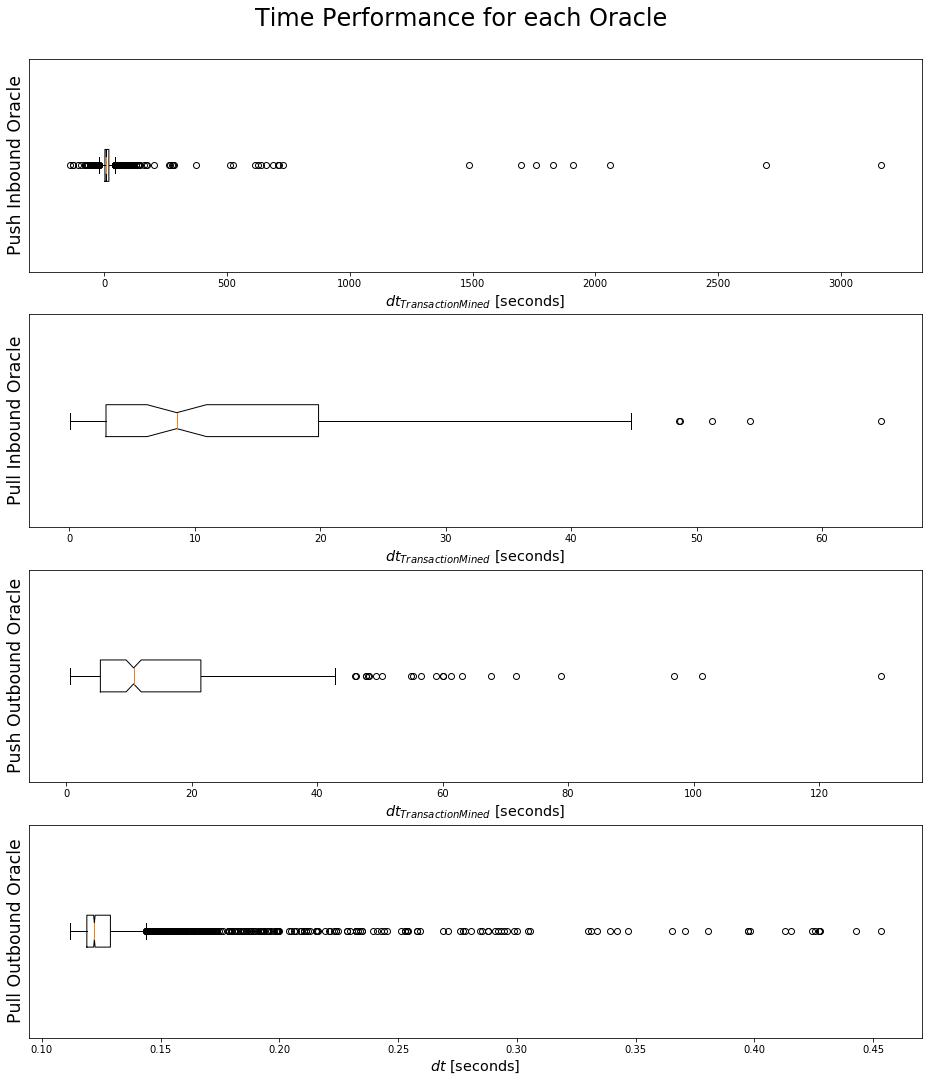

In [114]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=4,
    ncols=1,
    figsize=(16, 18))

fig.suptitle(
    "Time Performance for each Oracle",
    y=0.92,
    fontsize=24)



ax1.boxplot(
    df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)

ax1.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax2.boxplot(
    df_pull_inbound_oracle_order.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

ax2.tick_params(
    left=False, labelleft=False)

ax2.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax2.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


ax3.boxplot(
    df_push_outbound_oracle_arrival.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

ax3.tick_params(
    left=False, labelleft=False)

ax3.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax3.set_ylabel("Push Outbound Oracle", fontsize=FONT_SIZE)



ax4.boxplot(
    df_pull_outbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax4.tick_params(
    left=False, labelleft=False)

ax4.set_xlabel("$dt$ [seconds]", fontsize="x-large")

ax4.set_ylabel("Pull Outbound Oracle", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_time_performance_for_each_oracle.pdf", dpi=400)

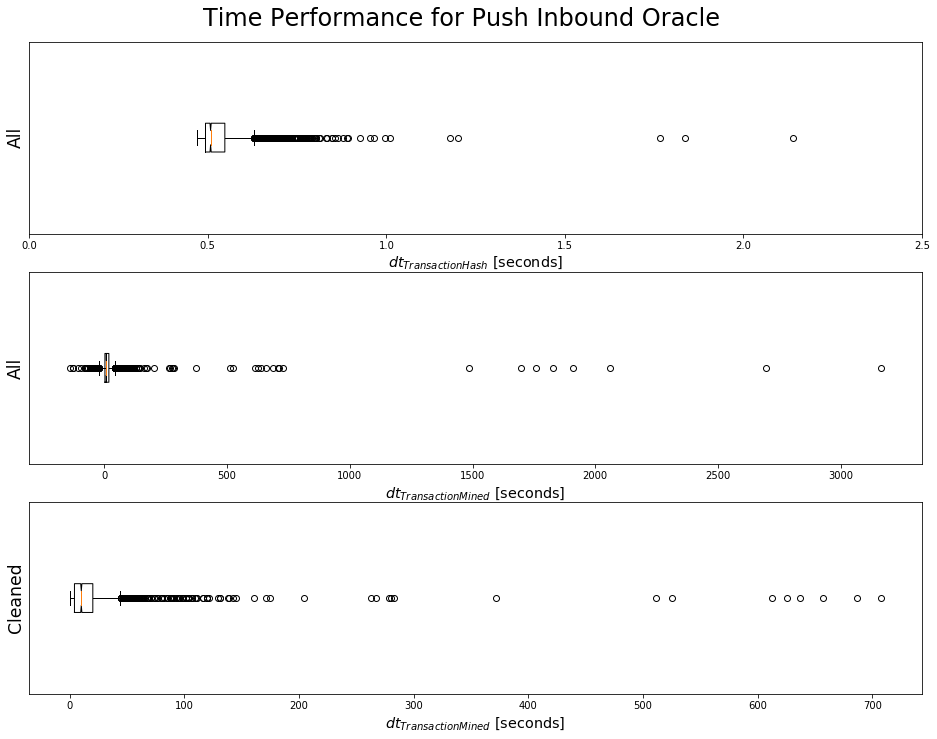

In [115]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(16, 12))

fig.suptitle(
    "Time Performance for Push Inbound Oracle",
    y=0.92,
    fontsize=24)



ax1.boxplot(
    df_push_inbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)

ax1.set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")
ax1.set_xlim(0, 2.5)

ax1.set_ylabel("All", fontsize=FONT_SIZE)



ax2.boxplot(
    df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

ax2.tick_params(
    left=False, labelleft=False)

ax2.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax2.set_ylabel("All", fontsize=FONT_SIZE)


LONGEST_DELETED = 10
ax3.boxplot(
    (df_push_inbound_oracle_arrival.sort_values('dt_transaction_mined_seconds_total', ascending=False)
                                   .dt_transaction_mined_seconds_total[LONGEST_DELETED:]
                                   [df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total > 0]),
    notch=True,
    vert=False)

ax3.tick_params(
    left=False, labelleft=False)

ax3.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax3.set_ylabel("Cleaned", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_push_inbound_oracle_time_performance.pdf", dpi=400)

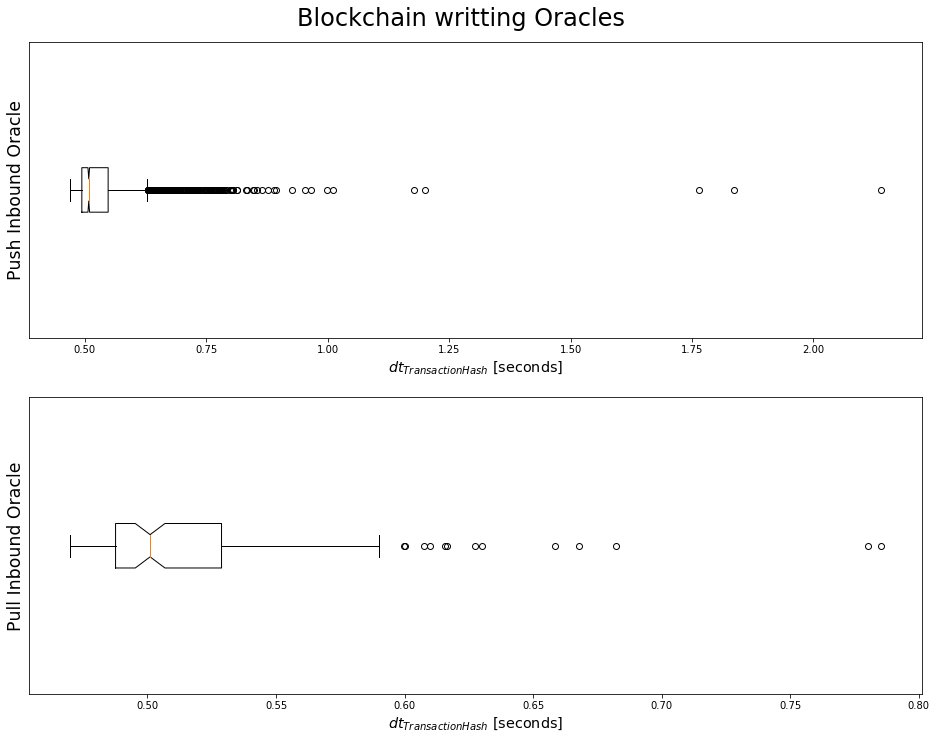

In [116]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(16, 12))

fig.suptitle(
    "Blockchain writting Oracles",
    y=0.92,
    fontsize=24)



ax1.boxplot(
    df_push_inbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)

ax1.set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")
# ax1.set_xlim(0, 2)

ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax2.boxplot(
    df_pull_inbound_oracle_order.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax2.tick_params(
    left=False, labelleft=False)

ax2.set_xlabel("$dt_{TransactionHash}$ [seconds]", fontsize="x-large")
# ax2.set_xlim(0, 1)

ax2.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_transaction_hash_time_performance.pdf", dpi=400)

In [117]:
(
    df_push_inbound_oracle_arrival
        .dt_transaction_hash_seconds_total
        .describe()
)

count    2586.000000
mean        0.535073
std         0.082754
min         0.468846
25%         0.493665
50%         0.507933
75%         0.547821
max         2.140109
Name: dt_transaction_hash_seconds_total, dtype: float64

In [118]:
(
    df_push_inbound_oracle_arrival
        .dt_transaction_mined_seconds_total
        .describe()
)

count    2586.000000
mean       22.817050
std       126.977176
min      -140.018969
25%         3.107843
50%         9.088548
75%        19.111525
max      3165.080123
Name: dt_transaction_mined_seconds_total, dtype: float64

In [119]:
(
    df_pull_inbound_oracle_order
        .dt_transaction_hash_seconds_total
        .describe()
)

count    126.000000
mean       0.520761
std        0.055188
min        0.469797
25%        0.487601
50%        0.501038
75%        0.528817
max        0.785457
Name: dt_transaction_hash_seconds_total, dtype: float64

In [120]:
(
    df_pull_inbound_oracle_order
        .dt_transaction_mined_seconds_total
        .describe()
)

count    126.000000
mean      13.395402
std       13.409762
min        0.031206
25%        2.918232
50%        8.564830
75%       19.865520
max       64.741326
Name: dt_transaction_mined_seconds_total, dtype: float64

In [121]:
(
    df_push_outbound_oracle_arrival
        .dt_transaction_mined_seconds_total
        .describe()
)

count    438.000000
mean      16.209495
std       15.957930
min        0.536532
25%        5.413601
50%       10.719105
75%       21.440090
max      129.958716
Name: dt_transaction_mined_seconds_total, dtype: float64

In [122]:
(
    df_pull_outbound_oracle_arrival
        .dt_transaction_hash_seconds_total
        .describe()
)

count    2611.000000
mean        0.132094
std         0.033626
min         0.111744
25%         0.118931
50%         0.122102
75%         0.128851
max         0.453529
Name: dt_transaction_hash_seconds_total, dtype: float64

In [123]:
(
    df_pull_outbound_oracle_arrival
        .dt_transaction_hash_microseconds
        .describe()
)

count      2611.000000
mean     132094.389889
std       33625.706824
min      111744.000000
25%      118931.000000
50%      122102.000000
75%      128851.000000
max      453529.000000
Name: dt_transaction_hash_microseconds, dtype: float64

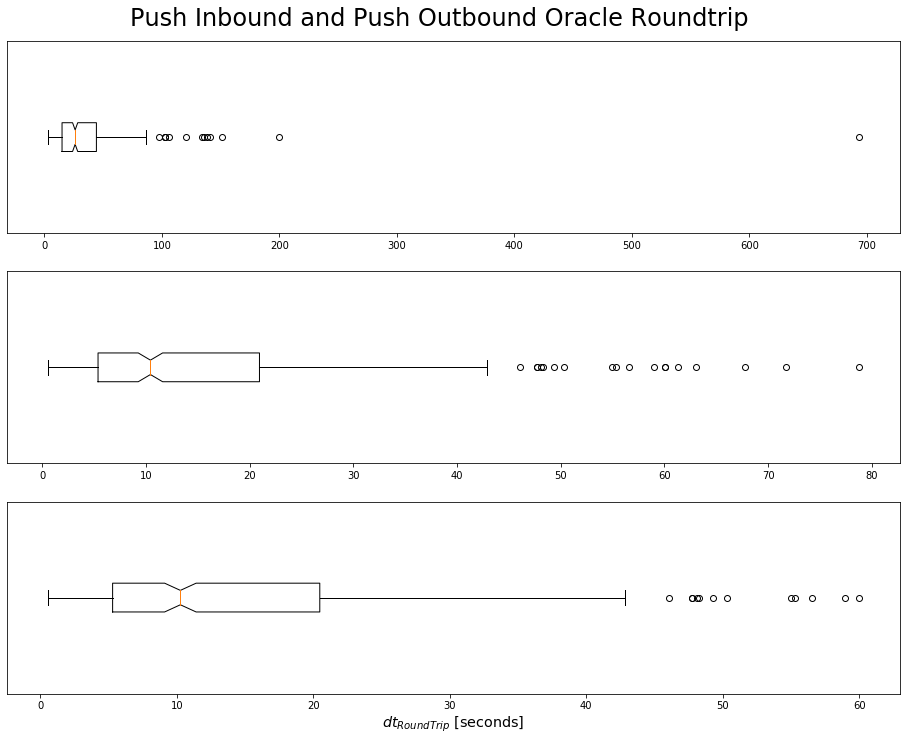

In [124]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3,
    ncols=1,
    figsize=(16, 12))

fig.suptitle(
    "Push Inbound and Push Outbound Oracle Roundtrip",
    y=0.92,
    fontsize=24)



ax1.boxplot(
    df_push_outbound_oracle_arrival.dt_round_trip_time_seconds_total,
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)



ax2.boxplot(
    (df_push_outbound_oracle_arrival.sort_values('dt_transaction_mined_seconds_total', ascending=False)
                                   .dt_transaction_mined_seconds_total[3:]
                                   [df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total > 0]),
    notch=True,
    vert=False)

ax2.tick_params(
    left=False, labelleft=False)



ax3.boxplot(
    (df_push_outbound_oracle_arrival.sort_values('dt_transaction_mined_seconds_total', ascending=False)
                                   .dt_transaction_mined_seconds_total[9:]
                                   [df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total > 0]),
    notch=True,
    vert=False)

ax3.tick_params(
    left=False, labelleft=False)

ax3.set_xlabel("$dt_{RoundTrip}$ [seconds]", fontsize="x-large")
# ax1.set_xlim(0, 1)

ax1.set_ylabel("", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_push_inbound_push_outbound_round_trip_performance.pdf", dpi=400)

## Gas

In [125]:
(df_push_inbound_oracle_arrival
     .transactionGasUsed
     .describe())

count     2586.000000
mean     44808.763341
std       1291.081997
min      36739.000000
25%      45139.000000
50%      45235.000000
75%      45259.000000
max      45319.000000
Name: transactionGasUsed, dtype: float64

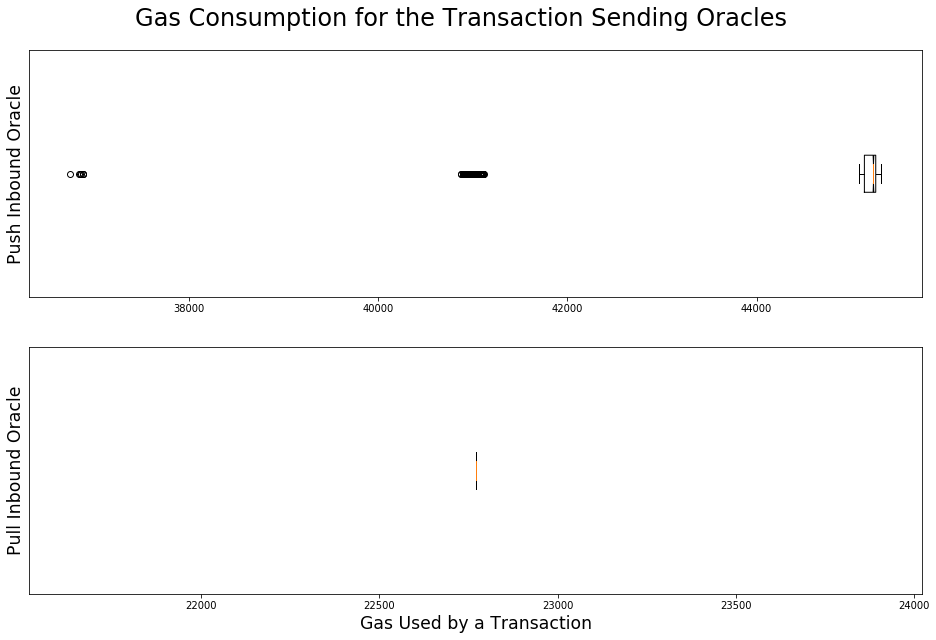

In [126]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(16, 10))

fig.suptitle(
    "Gas Consumption for the Transaction Sending Oracles",
    y=0.94,
    fontsize=24)



ax1.boxplot(
    df_push_inbound_oracle_arrival.transactionGasUsed,
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)

# ax1.set_xlabel("Gas Used by a Transaction", fontsize="x-large")

ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax2.boxplot(
    df_pull_inbound_oracle_order.transactionGasUsed,
    notch=True,
    vert=False)

ax2.tick_params(
    left=False, labelleft=False)

ax2.set_xlabel("Gas Used by a Transaction", fontsize="xx-large")

ax2.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_gas_performance_for_each_oracle.pdf", dpi=400)

In [127]:
df_push_inbound_oracle_arrival.transactionGasUsed.describe()

count     2586.000000
mean     44808.763341
std       1291.081997
min      36739.000000
25%      45139.000000
50%      45235.000000
75%      45259.000000
max      45319.000000
Name: transactionGasUsed, dtype: float64

In [128]:
df_pull_inbound_oracle_order.transactionGasUsed.describe()

count      126.0
mean     22770.0
std          0.0
min      22770.0
25%      22770.0
50%      22770.0
75%      22770.0
max      22770.0
Name: transactionGasUsed, dtype: float64

## Transaction Costs in Gwei, Ether, and Money (€)

In [129]:
df_push_inbound_oracle_arrival.transactionFeeGwei.astype(float).describe()

count      2586.000000
mean      35727.016156
std       42570.292602
min           0.000205
25%         452.710000
50%       45151.000000
75%       45259.000000
max      950691.000000
Name: transactionFeeGwei, dtype: float64

In [130]:
df_push_inbound_oracle_arrival.transactionFeeEuroAverage.astype(float).describe()

count    2.586000e+03
mean     5.526969e-03
std      6.585624e-03
min      3.170344e-11
25%      7.003424e-05
50%      6.984860e-03
75%      7.001567e-03
max      1.470719e-01
Name: transactionFeeEuroAverage, dtype: float64

In [131]:
df_pull_inbound_oracle_order.transactionFeeGwei.astype(float).describe()

count      126.000000
mean       615.115286
std       2737.323892
min          5.464800
25%          5.464800
50%          5.464800
75%          5.464800
max      12808.125000
Name: transactionFeeGwei, dtype: float64

In [132]:
df_pull_inbound_oracle_order.transactionFeeEuroAverage.astype(float).describe()

count    1.260000e+02
mean     1.440390e-03
std      1.537865e-03
min      6.333263e-07
25%      1.679040e-06
50%      2.092952e-03
75%      2.101027e-03
max      3.941514e-03
Name: transactionFeeEuroAverage, dtype: float64

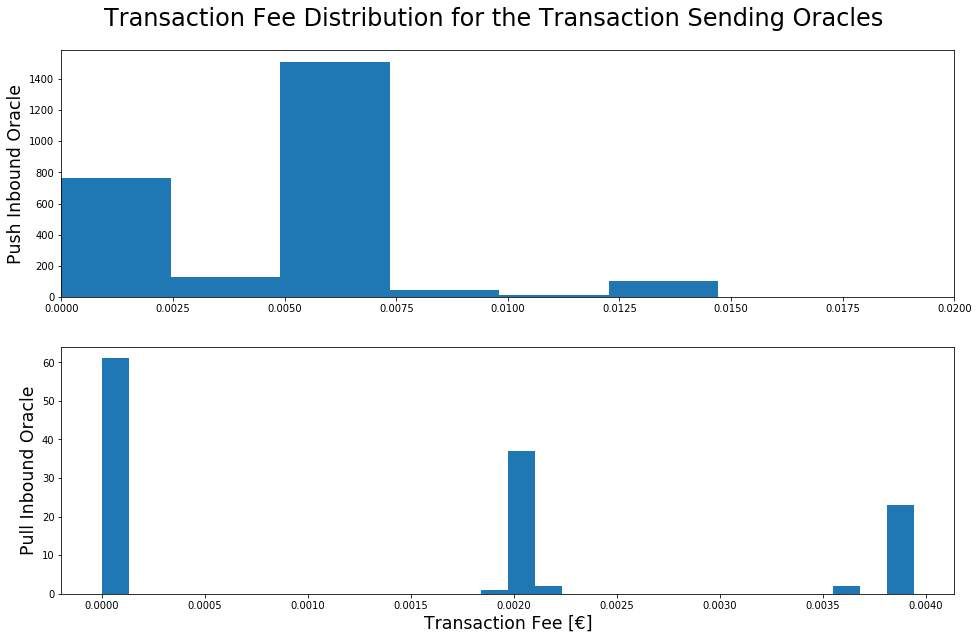

In [133]:
FONT_SIZE = "xx-large"

fig, (ax1, ax2) = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(16, 10))

fig.suptitle(
    "Transaction Fee Distribution for the Transaction Sending Oracles",
    y=0.94,
    fontsize=24)



ax1.hist(
    df_push_inbound_oracle_arrival.transactionFeeEuroAverage.astype(float),
    bins=60)

# ax1.set_xlabel("Transaction Fee [€]", fontsize="x-large")
ax1.set_xlim(0, 0.02)
ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax2.hist(
    df_pull_inbound_oracle_order.transactionFeeEuroAverage.astype(float),
    bins=30)

ax2.set_xlabel("Transaction Fee [€]", fontsize=FONT_SIZE)

ax2.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)



fig.savefig("qa_histogram_cost_performance_for_each_oracle.pdf", dpi=400)

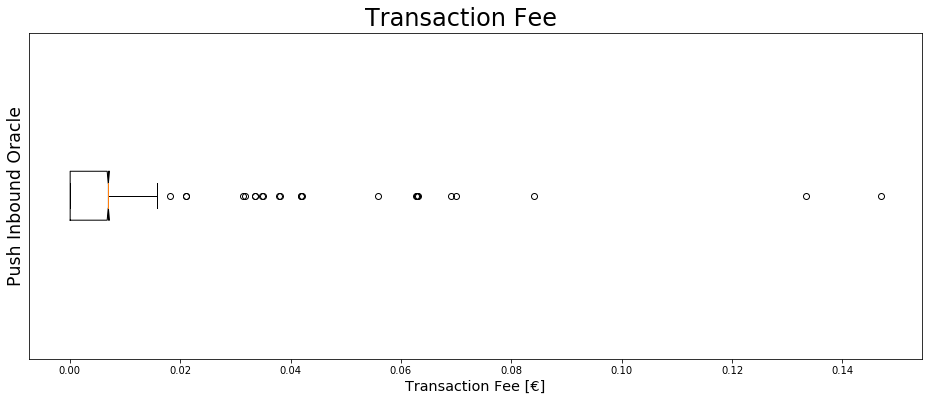

In [134]:
FONT_SIZE = "xx-large"

fig, (ax1) = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(16, 6))

fig.suptitle(
    "Transaction Fee",
    y=0.94,
    fontsize=24)



ax1.boxplot(
    df_push_inbound_oracle_arrival.transactionFeeEuroAverage.astype(float),
    notch=True,
    vert=False)

ax1.tick_params(
    left=False, labelleft=False)

ax1.set_xlabel("Transaction Fee [€]", fontsize="x-large")

ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)


fig.savefig("qa_boxplot_cost_performance_for_each_oracle.pdf", dpi=400)

# Save Data Frames for R

In [135]:
df_push_inbound_oracle_arrival.to_csv("./df_push_inbound_oracle_arrival")

In [136]:
df_pull_inbound_oracle_order.to_csv("./df_pull_inbound_oracle_order.csv")

In [137]:
df_pull_inbound_oracle_verify_customer.to_csv("./df_pull_inbound_oracle_verify_customer.csv")

In [138]:
df_push_outbound_oracle_arrival.columns

Index(['_id', 'received_timestamp', 'event', 'transaction', 'block',
       'decodedInput', 'arrivalCreationTimestamp', 'transaction_timestamp',
       'received_datetime', 'transaction_datetime',
       'arrival_creation_datetime', 'dt_transaction_mined',
       'dt_transaction_mined_seconds_total', 'dt_round_trip_time',
       'dt_round_trip_time_seconds_total', 'transactionCountInBlock'],
      dtype='object')

In [139]:
df_push_outbound_oracle_arrival.to_csv(
    "./df_push_outbound_oracle_arrival.csv",
    columns=['dt_transaction_mined_seconds_total', 'dt_round_trip_time_seconds_total', 'transactionCountInBlock'])

In [140]:
df_pull_outbound_oracle_arrival.columns

Index(['_id', 'start_timestamp', 'end_timestamp', 'transaction_hash', 'state',
       'transaction', 'block', 'start_datetime', 'end_datetime',
       'dt_transaction_hash', 'dt_transactoin_hash_seconds',
       'dt_transaction_hash_seconds_total',
       'dt_transaction_hash_microseconds'],
      dtype='object')

In [141]:
df_pull_outbound_oracle_arrival.to_csv("./df_pull_outbound_oracle_arrival.csv")

# Conference Paper Plots
First, we delete all $dt < 0$.

In [146]:
df_conf_push_inbound_oracle_arrival = df_push_inbound_oracle_arrival[
    df_push_inbound_oracle_arrival.dt_transaction_mined_seconds_total > 0]

In [165]:
df_conf_push_inbound_oracle_arrival.head()

,_id,transaction_hash,start_timestamp,end_timestamp,document,transaction,block,transaction_timestamp,start_datetime,end_datetime,...,dt_transaction_mined_seconds_total,transactionGasLimit,transactionGasUsed,gasPriceEther,gasPriceGwei,transactionFeeWei,transactionFeeGwei,transactionFeeEther,transactionFeeEuroAverage,transactionCountInBlock
0,5e976a8d53a82761edb60a2f,0x904bb68ca50b9f8a1f1059b789ec2d87dcab55d066fb...,1.586982e+09,1.586982e+09,"{'order': 'Samsung Galaxy S10e', 'location': '...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586981538,2020-04-15 22:11:56.899098,2020-04-15 22:11:57.421184,...,21.100902,54339,45283,5.625E-10,0.5625,25471687500000,25471.6875,0.0000254716875,0.003940,19
1,5e976e1153a82761edb60a31,0xc2c2df9ec9c21d99497550ec6482a93a062ffac06d2f...,1.586982e+09,1.586982e+09,"{'order': 'Motorola Moto G7 Plus', 'location':...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586982429,2020-04-15 22:26:56.887283,2020-04-15 22:26:57.426909,...,12.112717,54339,45283,5.625E-10,0.5625,25471687500000,25471.6875,0.0000254716875,0.003940,13
2,5e97719553a82761edb60a33,0x51e549887956adcce5ccf699dabaf766b006602fc360...,1.586983e+09,1.586983e+09,"{'order': 'iPhone 11 Pro', 'location': 'Budape...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586983324,2020-04-15 22:41:57.045447,2020-04-15 22:41:57.560157,...,6.954553,54224,45187,5.625E-10,0.5625,25417687500000,25417.6875,0.0000254176875,0.003932,7
3,5e97751953a82761edb60a35,0x8202187cb0c3b49a02c65c2869fa09dd605c0b1894b2...,1.586984e+09,1.586984e+09,"{'order': 'Samsung Galaxy Note10+', 'location'...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586984217,2020-04-15 22:56:56.880384,2020-04-15 22:56:57.436024,...,0.119616,54354,45295,5.625E-10,0.5625,25478437500000,25478.4375,0.0000254784375,0.003942,24
4,5e97789d53a82761edb60a37,0xda20a5ff5535d6931e057eb5ff5d57568594e13981e1...,1.586985e+09,1.586985e+09,"{'order': 'Samsung Galaxy S10e', 'location': '...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586985118,2020-04-15 23:11:56.956362,2020-04-15 23:11:57.470046,...,1.043638,54310,45259,5.625E-10,0.5625,25458187500000,25458.1875,0.0000254581875,0.003938,4


In [150]:
df_conf_pull_inbound_oracle_order = df_pull_inbound_oracle_order[
    df_pull_inbound_oracle_order.dt_transaction_mined_seconds_total > 0]

In [166]:
df_conf_pull_inbound_oracle_order.head()

,_id,transaction_hash,order,order_start_timestamp,order_end_timestamp,verify_customer,verify_customer_received_timestamp,transaction,block,transaction_timestamp,...,dt_transaction_mined_seconds_total,transactionGasLimit,transactionGasUsed,gasPriceEther,gasPriceGwei,transactionFeeWei,transactionFeeGwei,transactionFeeEther,transactionFeeEuroAverage,transactionCountInBlock
0,5e976ca52f3ca046f03a6f53,0xbe5e22a75965be9e86d6cd47276fe58ee6b33d8167f7...,"{'is_verified': True, 'order_ID': 1, 'error_co...",1.586982e+09,1.586982e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586982e+09,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586982055,...,1.662398,27324,22770,5.625E-10,0.5625,12808125000000,12808.1250,0.0000128081250,0.003940,3
1,5e9770362f3ca046f03a6f57,0x07eb2eaa20021d65429969959558236388e4906c0a94...,"{'is_verified': True, 'order_ID': 2, 'error_co...",1.586983e+09,1.586983e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586983e+09,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586982969,...,2.893511,27324,22770,5.625E-10,0.5625,12808125000000,12808.1250,0.0000128081250,0.003940,4
2,5e9773c52f3ca046f03a6f5b,0x91c8720954668a676689c8b3730b239dc9d1fe1336d5...,"{'is_verified': True, 'order_ID': 3, 'error_co...",1.586984e+09,1.586984e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586984e+09,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586983901,...,24.376213,27324,22770,5.625E-10,0.5625,12808125000000,12808.1250,0.0000128081250,0.003932,19
3,5e9777452f3ca046f03a6f5f,0x6a8af4435823d0b5e195ab726e602fbc7f2ba12f04f1...,"{'is_verified': True, 'order_ID': 4, 'error_co...",1.586985e+09,1.586985e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586985e+09,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586984774,...,1.506046,27324,22770,5.625E-10,0.5625,12808125000000,12808.1250,0.0000128081250,0.003942,7
4,5e977acd2f3ca046f03a6f63,0x71a6436d8ba4e22482811d12f77a5c6b55dc6d824fd8...,"{'is_verified': True, 'order_ID': 5, 'error_co...",1.586986e+09,1.586986e+09,{'address': '0x0a4D9d49Bd7e4402a8CfbA0B6d6C699...,1.586986e+09,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",1586985683,...,5.940713,27324,22770,5.625E-10,0.5625,12808125000000,12808.1250,0.0000128081250,0.003938,9


In [151]:
df_conf_push_outbound_oracle_arrival = df_push_outbound_oracle_arrival[
    df_push_outbound_oracle_arrival.dt_transaction_mined_seconds_total > 0]

In [167]:
df_conf_push_outbound_oracle_arrival.head()

,_id,received_timestamp,event,transaction,block,decodedInput,arrivalCreationTimestamp,transaction_timestamp,received_datetime,transaction_datetime,arrival_creation_datetime,dt_transaction_mined,dt_transaction_mined_seconds_total,dt_round_trip_time,dt_round_trip_time_seconds_total,transactionCountInBlock
0,5e976aa69c1a8f290e4bf129,1.586982e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1586981516,1586981538,2020-04-15 22:12:22.582107,2020-04-15 22:12:18,2020-04-15 22:11:56,00:00:04.582107,4.582107,00:00:26.582107,26.582107,19
1,5e976e269c1a8f290e4bf12b,1.586982e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1586982416,1586982429,2020-04-15 22:27:18.970490,2020-04-15 22:27:09,2020-04-15 22:26:56,00:00:09.970490,9.970490,00:00:22.970490,22.970490,13
2,5e9771c59c1a8f290e4bf12d,1.586983e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1586983316,1586983324,2020-04-15 22:42:45.414425,2020-04-15 22:42:04,2020-04-15 22:41:56,00:00:41.414425,41.414425,00:00:49.414425,49.414425,7
3,5e97751e9c1a8f290e4bf12f,1.586984e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1586984216,1586984217,2020-04-15 22:57:02.534216,2020-04-15 22:56:57,2020-04-15 22:56:56,00:00:05.534216,5.534216,00:00:06.534216,6.534216,24
4,5e9778a49c1a8f290e4bf131,1.586985e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1586985116,1586985118,2020-04-15 23:12:04.667391,2020-04-15 23:11:58,2020-04-15 23:11:56,00:00:06.667391,6.667391,00:00:08.667391,8.667391,4


In [152]:
df_conf_pull_outbound_oracle_arrival = df_pull_outbound_oracle_arrival

In [168]:
df_conf_pull_outbound_oracle_arrival.head()

,_id,start_timestamp,end_timestamp,transaction_hash,state,transaction,block,start_datetime,end_datetime,dt_transaction_hash,dt_transactoin_hash_seconds,dt_transaction_hash_seconds_total,dt_transaction_hash_microseconds
0,5e976b9d4854cbebf27c7b1f,1.586982e+09,1.586982e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",2020-04-15 22:16:29.712676,2020-04-15 22:16:29.841327,00:00:00.128651,0,0.128651,128651
1,5e976f214854cbebf27c7b21,1.586983e+09,1.586983e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",2020-04-15 22:31:29.738051,2020-04-15 22:31:29.859117,00:00:00.121066,0,0.121066,121066
2,5e9772a54854cbebf27c7b23,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",2020-04-15 22:46:29.623616,2020-04-15 22:46:29.747954,00:00:00.124338,0,0.124338,124338
3,5e9776294854cbebf27c7b25,1.586984e+09,1.586984e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",2020-04-15 23:01:29.653028,2020-04-15 23:01:29.774662,00:00:00.121634,0,0.121634,121634
4,5e9779ad4854cbebf27c7b27,1.586985e+09,1.586985e+09,0xf15753a9ef3d83e6d9974a936795039605449cdf2530...,"{'_order': 'iPhone 11', '_location': 'Zagreb',...","(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...",2020-04-15 23:16:29.658536,2020-04-15 23:16:29.775482,00:00:00.116946,0,0.116946,116946


In [175]:
print(df_conf_pull_inbound_oracle_order.transaction_datetime.min())
print(df_conf_pull_inbound_oracle_order.transaction_datetime.max())

2020-04-15 22:20:55
2020-04-19 23:07:34


[Coinbase](https://www.coinbase.com/price/ethereum?locale=de)

|Date Time | €/Eth |
|-------|----|
|2020-04-15 2h00m |$144.86$|
|2020-04-19 2h00m |$172.56$|

In [178]:
start_price = 144.86
end_price = 172.56

mu_price = (start_price+end_price)/2

df_conf_pull_inbound_oracle_order["transactionFeeEuroAverage"] = (
    df_conf_pull_inbound_oracle_order
        .transactionFeeEther
        .apply(
            lambda transactionFeeEther: float(transactionFeeEther) * mu_euro))

In [176]:
print(df_conf_push_inbound_oracle_arrival.transaction_datetime.min())
print(df_conf_push_inbound_oracle_arrival.transaction_datetime.max())

2020-04-15 22:12:18
2020-05-13 01:41:58


| Date Time | €/Eth |
|--|--|
|2020-04-15 2h:00m| 144.86 |
|2020-05-13 2h:00m| 175.43 |

In [179]:
start_price = 144.86
end_price = 175.43

mu_price = (start_price+end_price)/2

df_conf_push_inbound_oracle_arrival["transactionFeeEuroAverage"] = (
    df_conf_push_inbound_oracle_arrival
        .transactionFeeEther
        .apply(
            lambda transactionFeeEther: float(transactionFeeEther) * mu_euro))

/home/stefan/anaconda3/envs/blockchain/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [181]:
print(df_conf_push_outbound_oracle_arrival.transaction_datetime.min())
print(df_conf_push_outbound_oracle_arrival.transaction_datetime.max())

2020-04-15 22:12:18
2020-04-19 23:57:07


In [184]:
print(df_conf_pull_outbound_oracle_arrival.start_datetime.min())
print(df_conf_pull_outbound_oracle_arrival.start_datetime.max())

2020-04-15 22:16:29.712676
2020-05-13 02:46:29.785781


In [196]:
df_push_outbound_oracle_arrival.columns

Index(['_id', 'received_timestamp', 'event', 'transaction', 'block',
       'decodedInput', 'arrivalCreationTimestamp', 'transaction_timestamp',
       'received_datetime', 'transaction_datetime',
       'arrival_creation_datetime', 'dt_transaction_mined',
       'dt_transaction_mined_seconds_total', 'dt_round_trip_time',
       'dt_round_trip_time_seconds_total', 'transactionCountInBlock'],
      dtype='object')

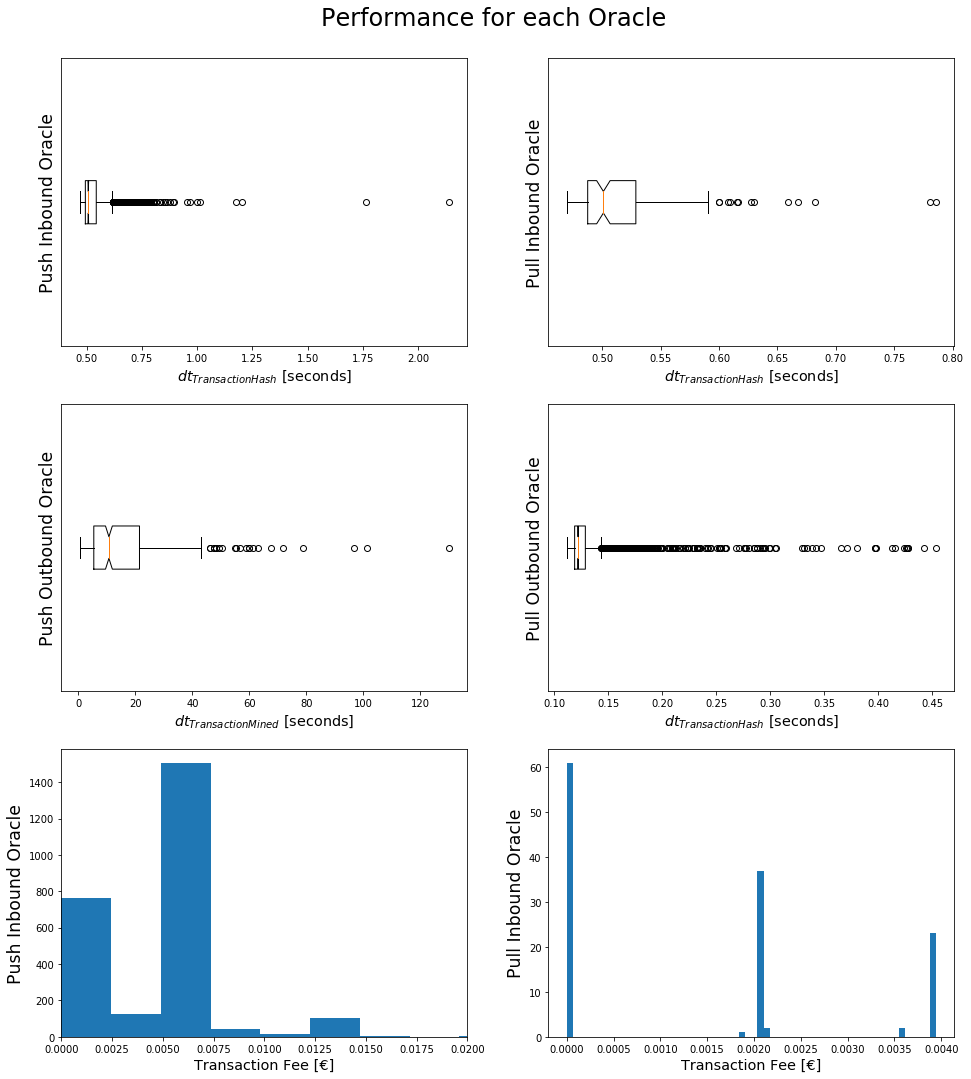

In [199]:
FONT_SIZE = "xx-large"

fig, ax = plt.subplots(
    nrows=3,
    ncols=2,
    figsize=(16, 18))

fig.suptitle(
    "Performance for each Oracle",
    y=0.92,
    fontsize=24)



ax[0, 0].boxplot(
    df_conf_push_inbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax[0, 0].tick_params(
    left=False, labelleft=False)

ax[0, 0].set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

ax[0, 0].set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax[0, 1].boxplot(
    df_conf_pull_inbound_oracle_order.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax[0, 1].tick_params(
    left=False, labelleft=False)

ax[0, 1].set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

ax[0, 1].set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


ax[1, 0].boxplot(
    df_conf_push_outbound_oracle_arrival.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

ax[1, 0].tick_params(
    left=False, labelleft=False)

ax[1, 0].set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

ax[1, 0].set_ylabel("Push Outbound Oracle", fontsize=FONT_SIZE)



ax[1, 1].boxplot(
    df_conf_pull_outbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

ax[1, 1].tick_params(
    left=False, labelleft=False)

ax[1, 1].set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

ax[1, 1].set_ylabel("Pull Outbound Oracle", fontsize=FONT_SIZE)



ax[2, 0].hist(
    df_push_inbound_oracle_arrival.transactionFeeEuroAverage.astype(float),
    bins=60)

ax[2, 0].set_xlabel("Transaction Fee [€]", fontsize="x-large")
ax[2, 0].set_xlim(0, 0.02)
ax[2, 0].set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



ax[2, 1].hist(
    df_pull_inbound_oracle_order.transactionFeeEuroAverage.astype(float),
    bins=60)

ax[2, 1].set_xlabel("Transaction Fee [€]", fontsize="x-large")

ax[2, 1].set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


fig.savefig("qa_conf_boxplot_for_each_oracle.pdf", dpi=400)

In [211]:
df_conf_push_outbound_oracle_arrival.dt_round_trip_time_seconds_total.describe()

count    438.000000
mean      34.328217
std       40.269652
min        2.826764
25%       14.962902
50%       26.118423
75%       44.218345
max      693.719596
Name: dt_round_trip_time_seconds_total, dtype: float64

In [213]:
df_conf_push_outbound_oracle_arrival[
    df_conf_push_outbound_oracle_arrival.dt_round_trip_time_seconds_total == 693.719596]

,_id,received_timestamp,event,transaction,block,decodedInput,arrivalCreationTimestamp,transaction_timestamp,received_datetime,transaction_datetime,arrival_creation_datetime,dt_transaction_mined,dt_transaction_mined_seconds_total,dt_round_trip_time,dt_round_trip_time_seconds_total,transactionCountInBlock
66,5e982b199c1a8f290e4bf1ad,1.587031e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587030116,1587030804,2020-04-16 11:53:29.719596,2020-04-16 11:53:24,2020-04-16 11:41:56,00:00:05.719596,5.719596,00:11:33.719596,693.719596,48


In [214]:
df_conf_push_outbound_oracle_arrival.sort_values(
    by="dt_round_trip_time_seconds_total", ascending=False).head()

,_id,received_timestamp,event,transaction,block,decodedInput,arrivalCreationTimestamp,transaction_timestamp,received_datetime,transaction_datetime,arrival_creation_datetime,dt_transaction_mined,dt_transaction_mined_seconds_total,dt_round_trip_time,dt_round_trip_time_seconds_total,transactionCountInBlock
66,5e982b199c1a8f290e4bf1ad,1.587031e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587030116,1587030804,2020-04-16 11:53:29.719596,2020-04-16 11:53:24,2020-04-16 11:41:56,00:00:05.719596,5.719596,00:11:33.719596,693.719596,48
160,5e9949739c1a8f290e4bf269,1.587104e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587103916,1587104078,2020-04-17 08:15:15.312900,2020-04-17 08:14:38,2020-04-17 08:11:56,00:00:37.312900,37.312900,00:03:19.312900,199.312900,93
58,5e980cdb9c1a8f290e4bf19d,1.587023e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587022916,1587022966,2020-04-16 09:44:27.289289,2020-04-16 09:42:46,2020-04-16 09:41:56,00:01:41.289289,101.289289,00:02:31.289289,151.289289,49
153,5e99309c9c1a8f290e4bf25b,1.587098e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587097616,1587097720,2020-04-17 06:29:16.656997,2020-04-17 06:28:40,2020-04-17 06:26:56,00:00:36.656997,36.656997,00:02:20.656997,140.656997,78
148,5e991f069c1a8f290e4bf251,1.587093e+09,{'address': '0x1186aEDAb8f37C08CC00a887dBb1197...,"(blockHash, blockNumber, from, gas, gasPrice, ...","(difficulty, extraData, gasLimit, gasUsed, has...","(<Function setArrival(string,string,uint256)>,...",1587093116,1587093237,2020-04-17 05:14:14.589597,2020-04-17 05:13:57,2020-04-17 05:11:56,00:00:17.589597,17.589597,00:02:18.589597,138.589597,69


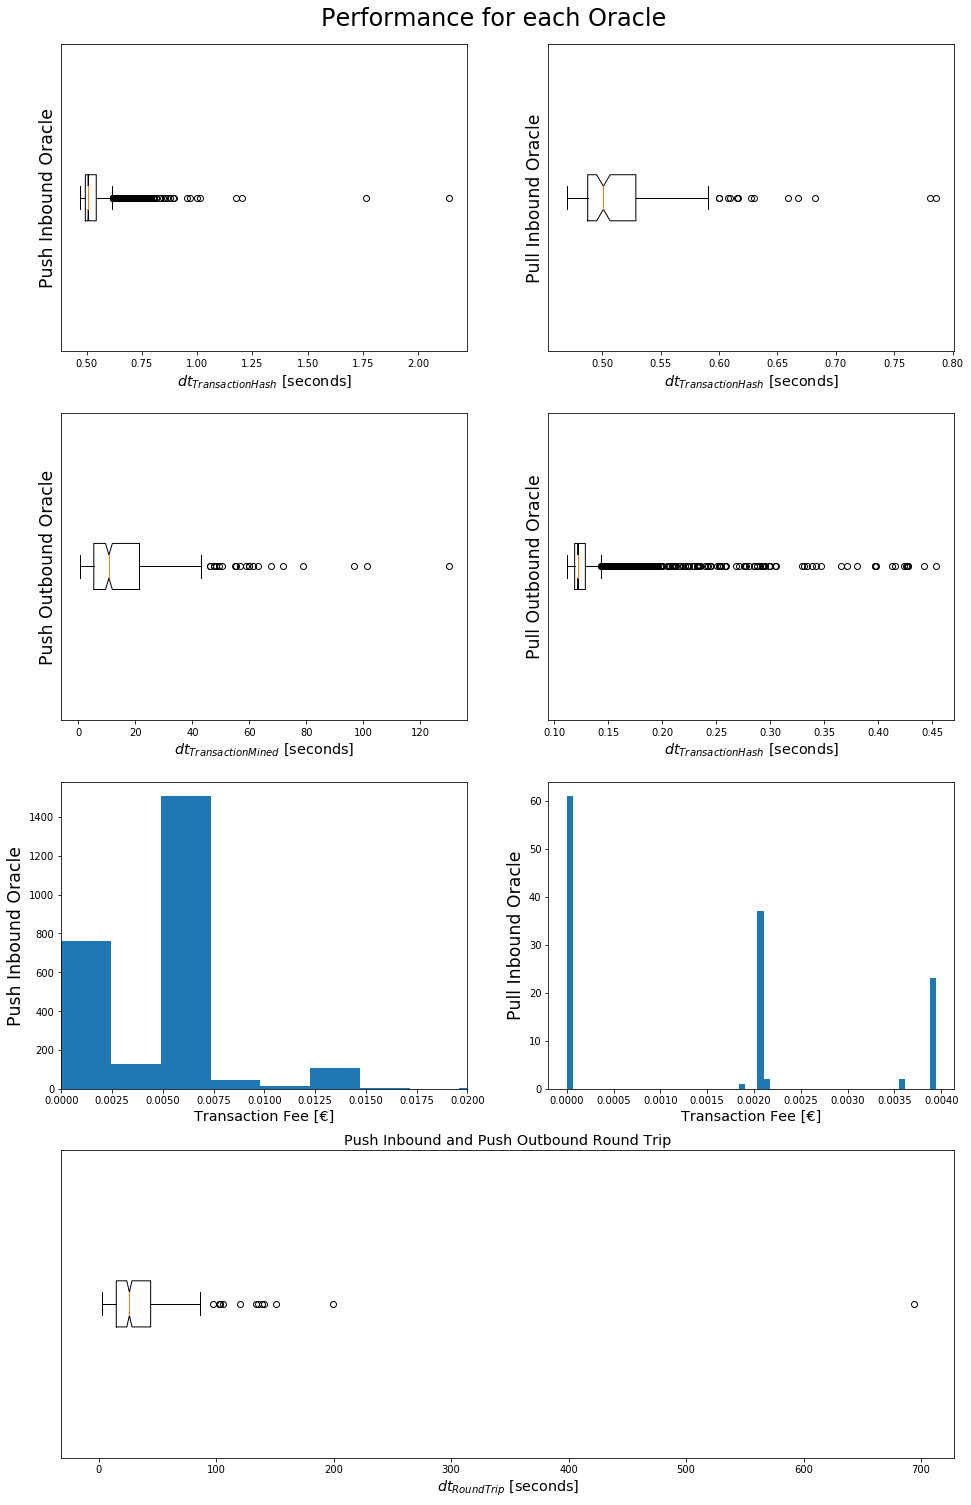

In [207]:
FONT_SIZE = "xx-large"

fig = plt.figure(figsize=(16, 26))

fig.suptitle(
    "Performance for each Oracle",
    y=0.9,
    fontsize=24)

gs = fig.add_gridspec(4, 2)


fig_ax1 = fig.add_subplot(gs[0, 0])
fig_ax1.boxplot(
    df_conf_push_inbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

fig_ax1.tick_params(
    left=False, labelleft=False)

fig_ax1.set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

fig_ax1.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)



fig_ax2 = fig.add_subplot(gs[0, 1])
fig_ax2.boxplot(
    df_conf_pull_inbound_oracle_order.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

fig_ax2.tick_params(
    left=False, labelleft=False)

fig_ax2.set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

fig_ax2.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)


fig_ax3 = fig.add_subplot(gs[1, 0])
fig_ax3.boxplot(
    df_conf_push_outbound_oracle_arrival.dt_transaction_mined_seconds_total,
    notch=True,
    vert=False)

fig_ax3.tick_params(
    left=False, labelleft=False)

fig_ax3.set_xlabel("$dt_{Transaction Mined}$ [seconds]", fontsize="x-large")

fig_ax3.set_ylabel("Push Outbound Oracle", fontsize=FONT_SIZE)


fig_ax4 = fig.add_subplot(gs[1, 1])
fig_ax4.boxplot(
    df_conf_pull_outbound_oracle_arrival.dt_transaction_hash_seconds_total,
    notch=True,
    vert=False)

fig_ax4.tick_params(
    left=False, labelleft=False)

fig_ax4.set_xlabel("$dt_{Transaction Hash}$ [seconds]", fontsize="x-large")

fig_ax4.set_ylabel("Pull Outbound Oracle", fontsize=FONT_SIZE)


fig_ax5 = fig.add_subplot(gs[2, 0])
fig_ax5.hist(
    df_push_inbound_oracle_arrival.transactionFeeEuroAverage.astype(float),
    bins=60)

fig_ax5.set_xlabel("Transaction Fee [€]", fontsize="x-large")
fig_ax5.set_xlim(0, 0.02)
fig_ax5.set_ylabel("Push Inbound Oracle", fontsize=FONT_SIZE)


fig_ax6 = fig.add_subplot(gs[2, 1])
fig_ax6.hist(
    df_pull_inbound_oracle_order.transactionFeeEuroAverage.astype(float),
    bins=60)

fig_ax6.set_xlabel("Transaction Fee [€]", fontsize="x-large")

fig_ax6.set_ylabel("Pull Inbound Oracle", fontsize=FONT_SIZE)



fig_ax7 = fig.add_subplot(gs[3, :])
fig_ax7.set_title("Push Inbound and Push Outbound Round Trip", fontsize="x-large")
fig_ax7.boxplot(
    df_push_outbound_oracle_arrival.dt_round_trip_time_seconds_total,
    notch=True,
    vert=False)

fig_ax7.tick_params(
    left=False, labelleft=False)

fig_ax7.set_xlabel("$dt_{Round Trip}$ [seconds]", fontsize="x-large")



fig.savefig("qa_conf_evaluation_plots_for_each_oracle.pdf", dpi=400)

In [186]:
df_pull_inbound_oracle_order.transactionFeeEuroAverage.describe()

count    1.260000e+02
mean     1.440390e-03
std      1.537865e-03
min      6.333263e-07
25%      1.679040e-06
50%      2.092952e-03
75%      2.101027e-03
max      3.941514e-03
Name: transactionFeeEuroAverage, dtype: float64

In [195]:
df_pull_inbound_oracle_order.transactionFeeEther.unique()

array([Decimal('0.0000128081250'), Decimal('5.46480E-9')], dtype=object)

Total costs of inbound oracles.

In [187]:
(
    df_pull_inbound_oracle_order.transactionFeeEuroAverage.sum() + 
    df_push_inbound_oracle_arrival.transactionFeeEuroAverage.sum()
)

14.47423202994693

Number of transaction for all inbound oracles.

In [192]:
(
    df_pull_inbound_oracle_order.shape[0] +
    df_push_inbound_oracle_arrival.shape[0]
)

2712